# Machine Learning - Final Group Project: Online News Popularity

In [1]:
import seaborn as sns
from copy import copy
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.impute import SimpleImputer


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Data Preprocessing

### Exploratory Analysis 

In [2]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
data.shape
AD= data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


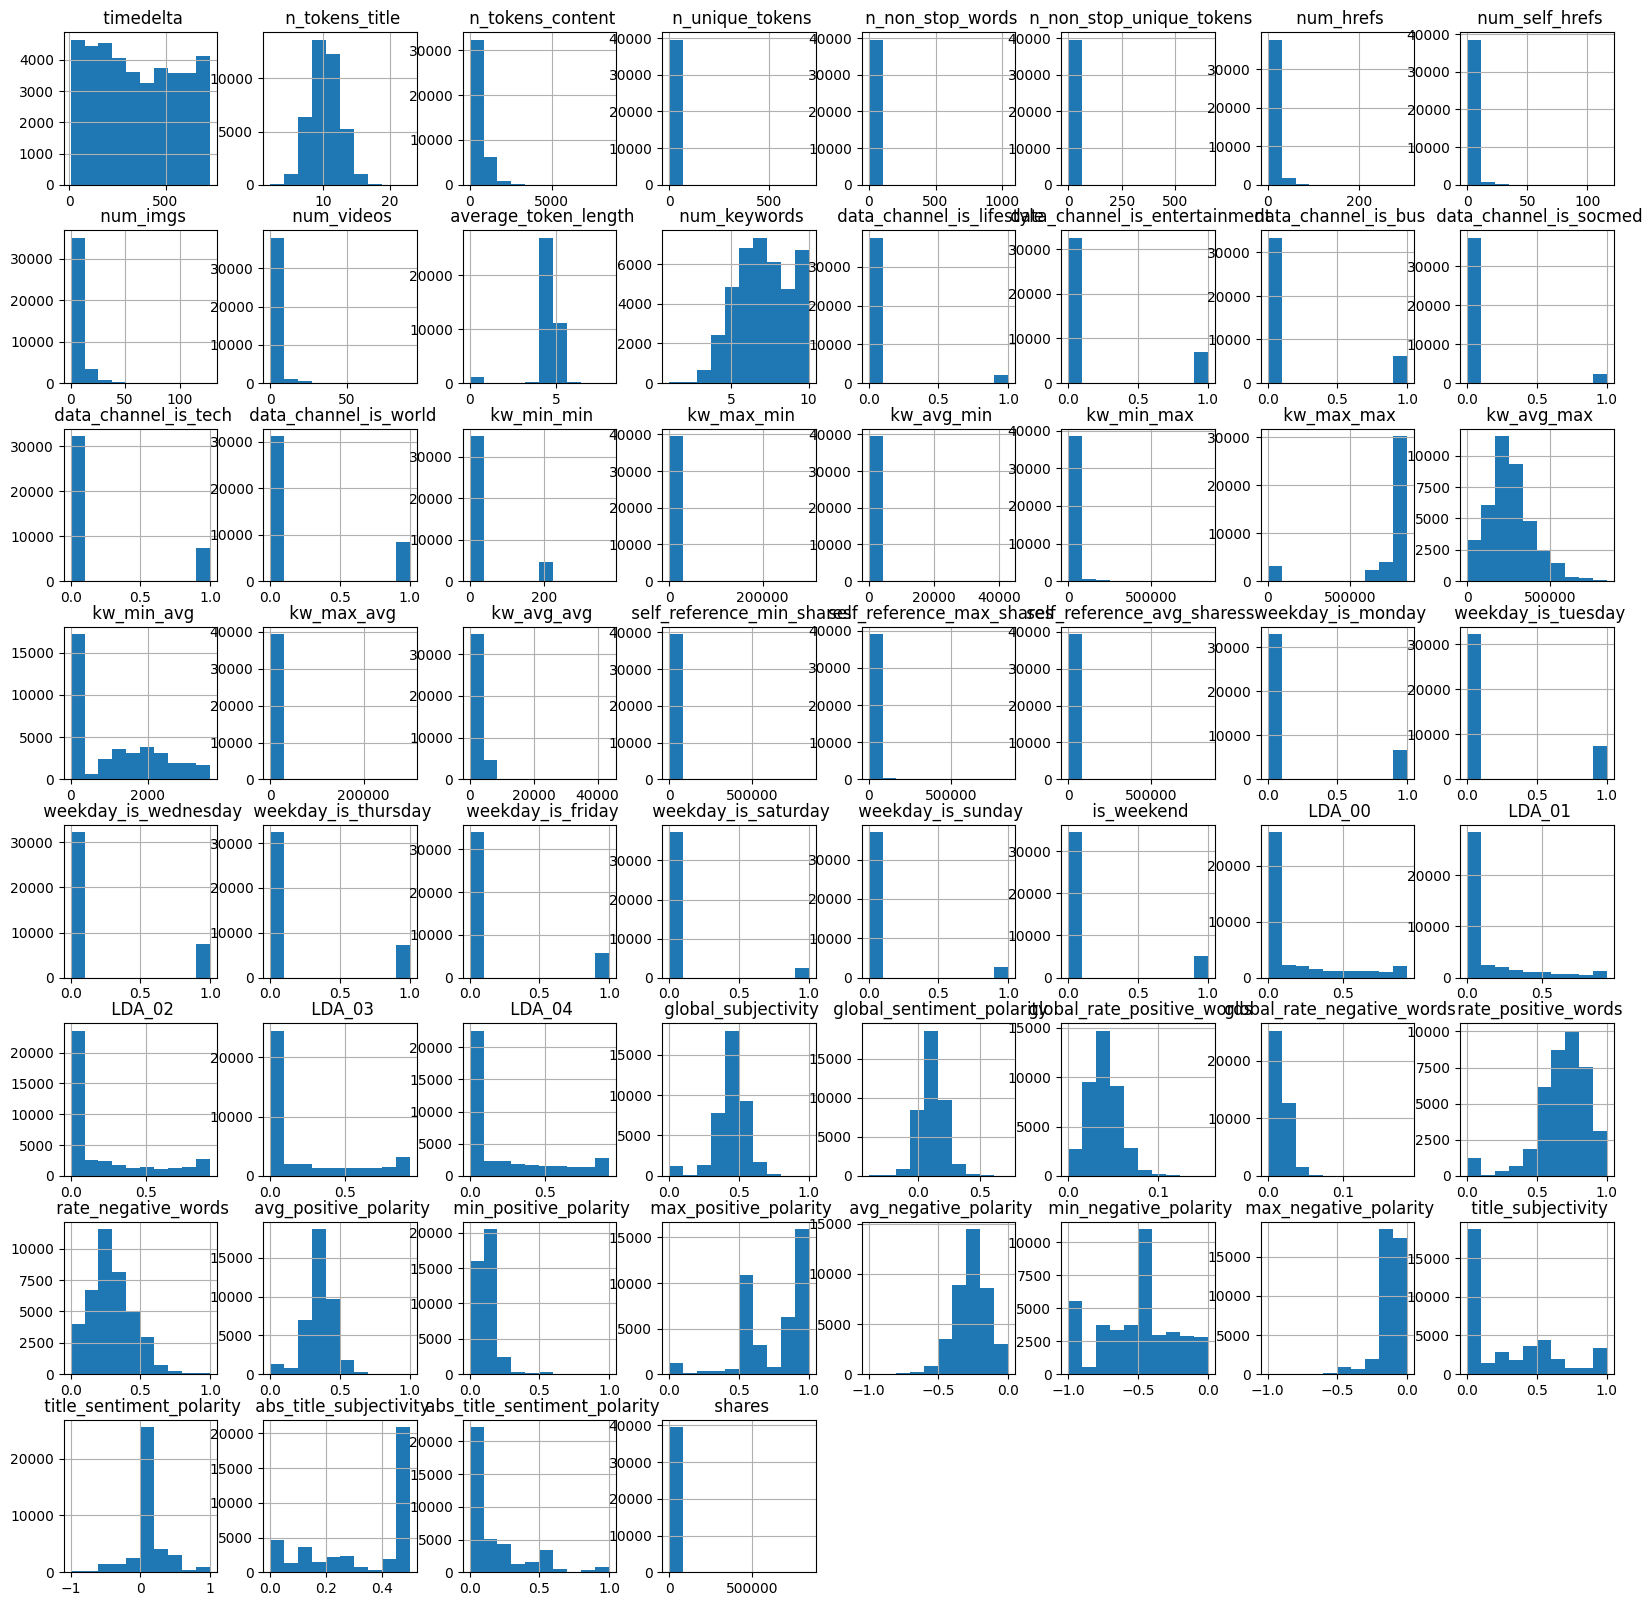

In [6]:
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot: ylabel='Frequency'>

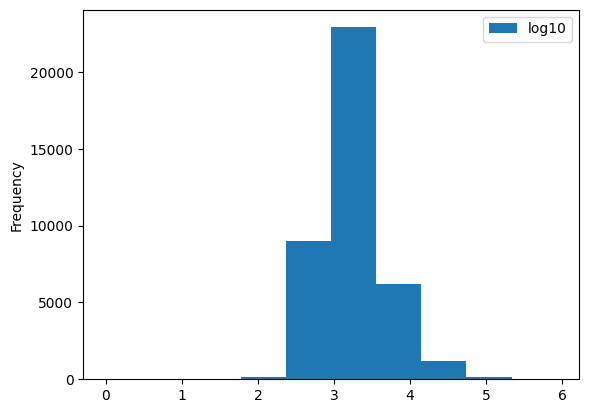

In [7]:
ff = data[' shares'].transform([np.log10])
ff.replace([np.inf, -np.inf], np.nan, inplace=True)
ff.dropna()
ff.plot.hist()

/tmp/ipykernel_1159/2959741966.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot: >

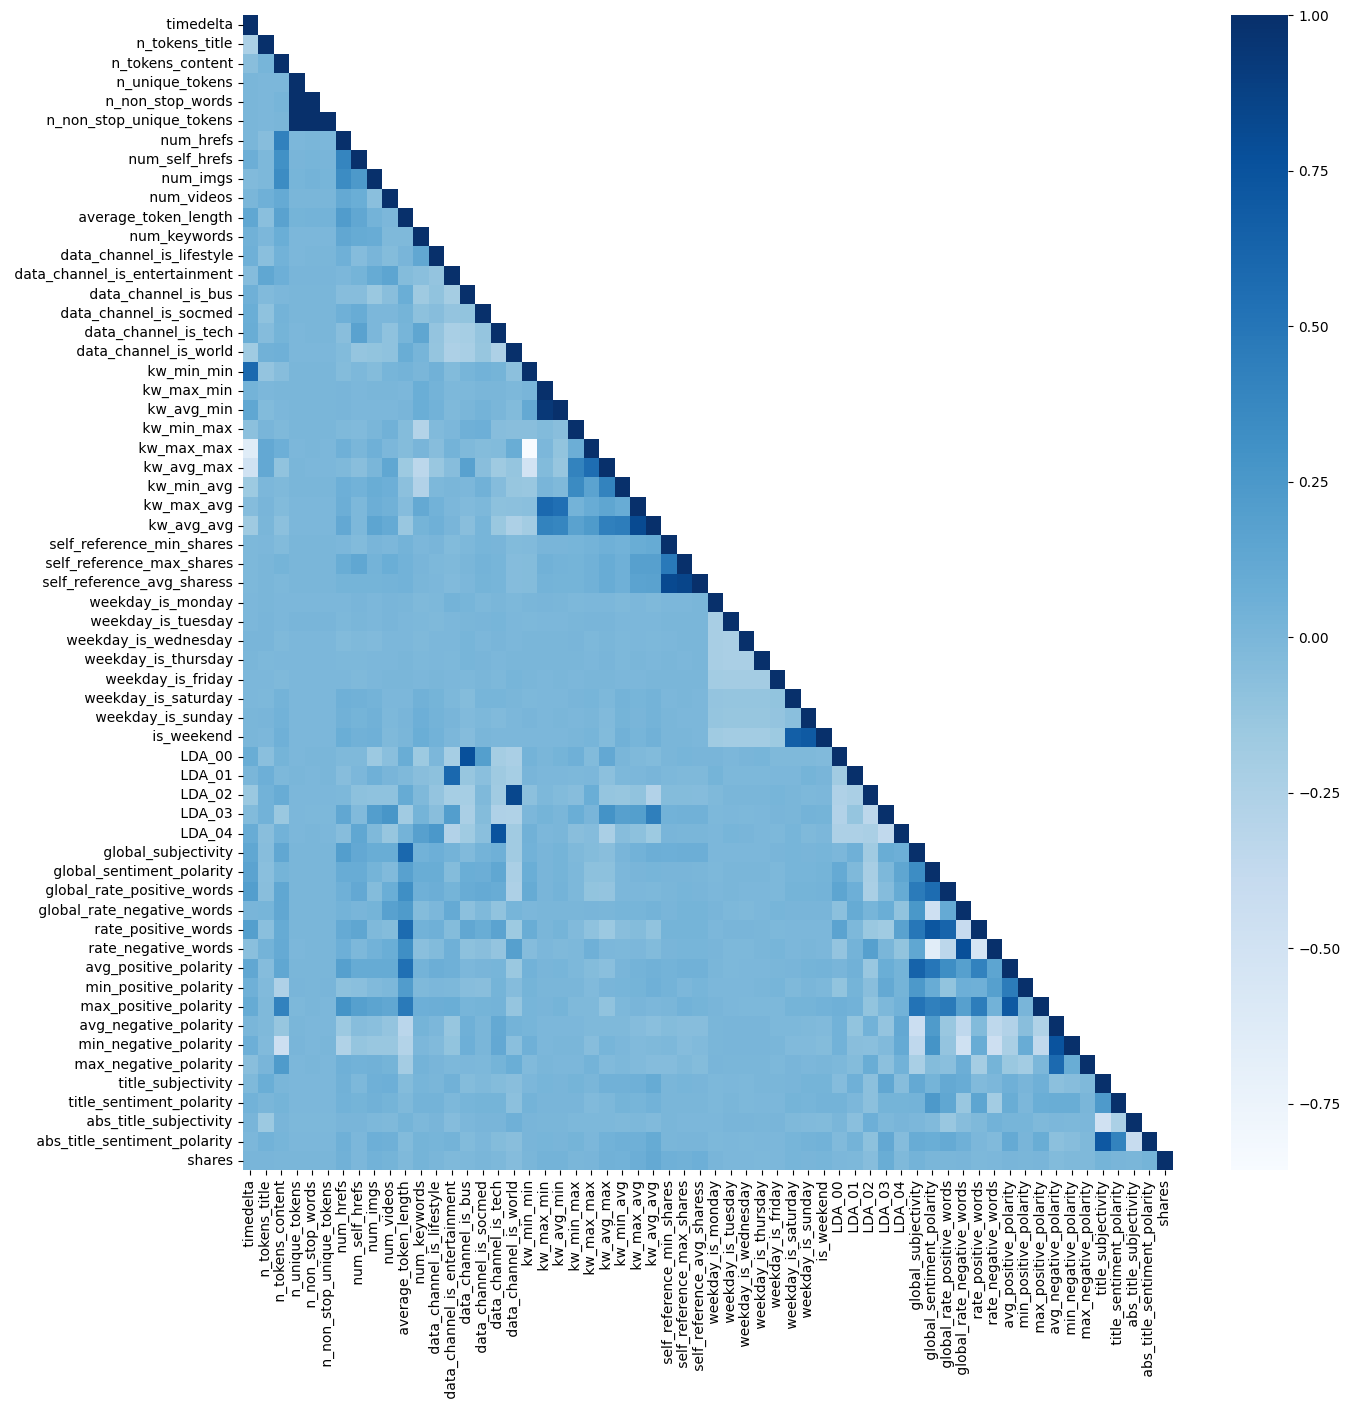

In [8]:
cor=data.corr()
plt.figure(figsize=(15,15))
data_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(data_lt,cmap='Blues')

### Removing Noise 

In [9]:
#Identifying all variables with missing values 
n=data.isna().sum()
n[n>0]

Series([], dtype: int64)

No missing values.

In [10]:
data.columns=data.columns.str.replace(" ","")

In [11]:
#The number of words in the content is represented by n_tokens_content
#Since its minimum value is 0 there are articles with no words that have to be removed
num_of_nowords=data[data['n_tokens_content']==0].index
print('Number news articles with no words',num_of_nowords.size)

#Remove news articles without content
data = data[data['n_tokens_content'] != 0]

Number news articles with no words 1181


In [12]:
#Remove non predictive features
data = data.drop('url',axis=1)
data = data.drop('timedelta',axis=1)
data = data.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 38463 non-null  float64
 1   n_tokens_content               38463 non-null  float64
 2   n_unique_tokens                38463 non-null  float64
 3   num_hrefs                      38463 non-null  float64
 4   num_self_hrefs                 38463 non-null  float64
 5   num_imgs                       38463 non-null  float64
 6   num_videos                     38463 non-null  float64
 7   average_token_length           38463 non-null  float64
 8   num_keywords                   38463 non-null  float64
 9   data_channel_is_lifestyle      38463 non-null  float64
 10  data_channel_is_entertainment  38463 non-null  float64
 11  data_channel_is_bus            38463 non-null  float64
 12  data_channel_is_socmed         38463 non-null 

## Target Classification label

In [14]:
#Understanding target variable distribution
data['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [15]:
data['shares'].median()

1400.0

Outliers affect the mean value of the data but have little effect on the median of a given set of data, therefore we choose the median for the popularity threshold 

In [16]:
#target label
target_variable = list()
for share in data['shares']:
    if share > 1400:
        target_variable.append('Popular')
    elif share <= 1400:
        target_variable.append('Unpopular')

# Update target label into the dataframe
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(target_variable, columns=['popularity'])], axis=1)

In [17]:
count = Counter(data['popularity'])


Examination of the effect of the independent variables on the target dependent variable 

In [18]:
# Get the features from dataset
features = data.head()
features

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


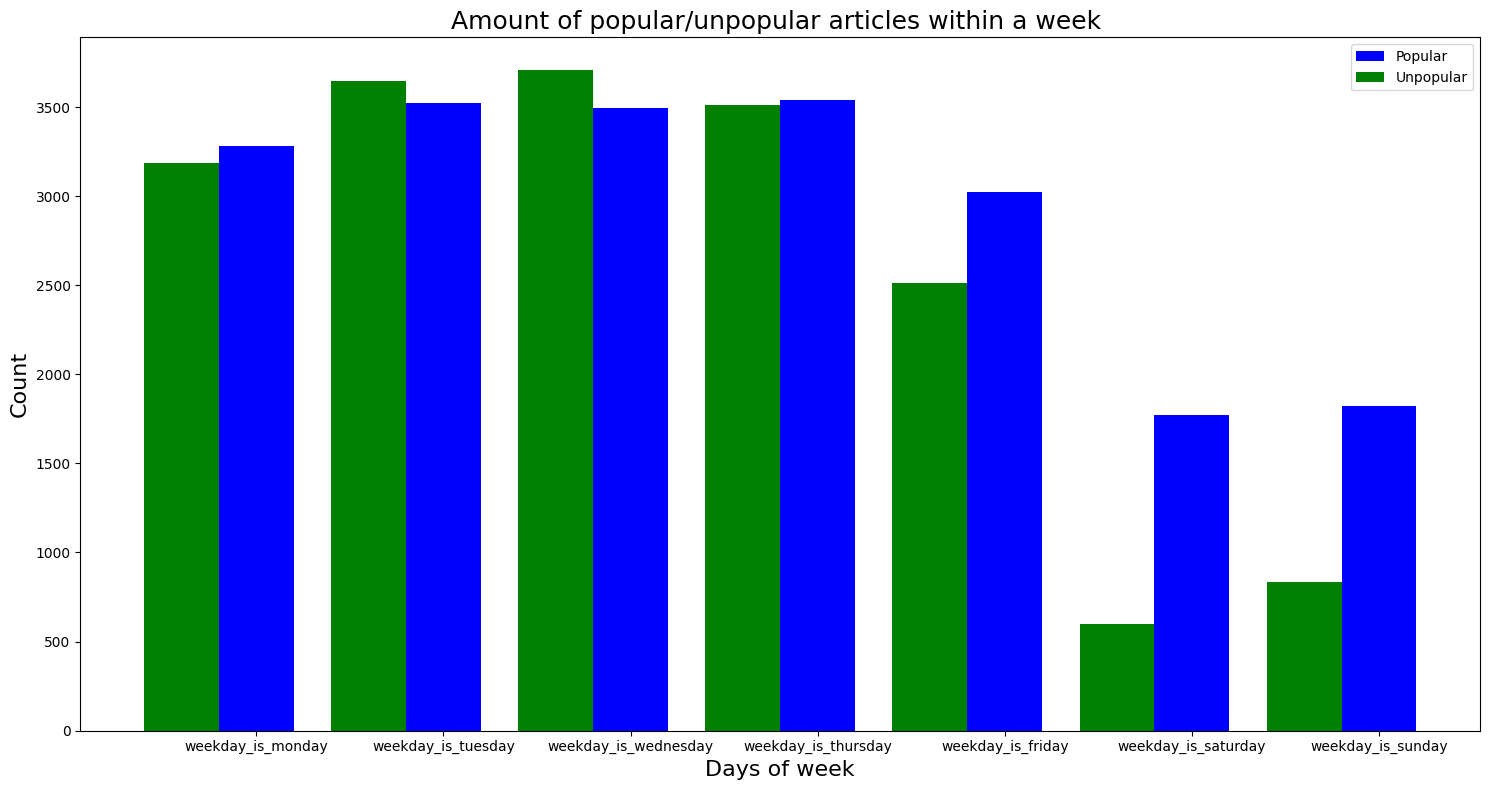

In [19]:
#Day of the week vs Popularity
col_days = data.columns.values[26:33]
art_npop =data[data['shares']<1400]
art_pop=data[data['shares']>=1400]
npop_day = art_npop[col_days].sum().values
pop_day = art_pop[col_days].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (15,8))
pl.title("Amount of popular/unpopular articles within a week ", fontsize = 18)
pl.bar(np.arange(len(col_days)), pop_day, width = 0.4, align="center", color = 'b', \
          label = "Popular")
pl.bar(np.arange(len(col_days)) - 0.4, npop_day, width = 0.4, align = "center", color = 'g', \
          label = "Unpopular")
pl.xticks(np.arange(len(col_days)), col_days)
pl.ylabel("Count", fontsize = 16)
pl.xlabel("Days of week", fontsize = 16)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.show()

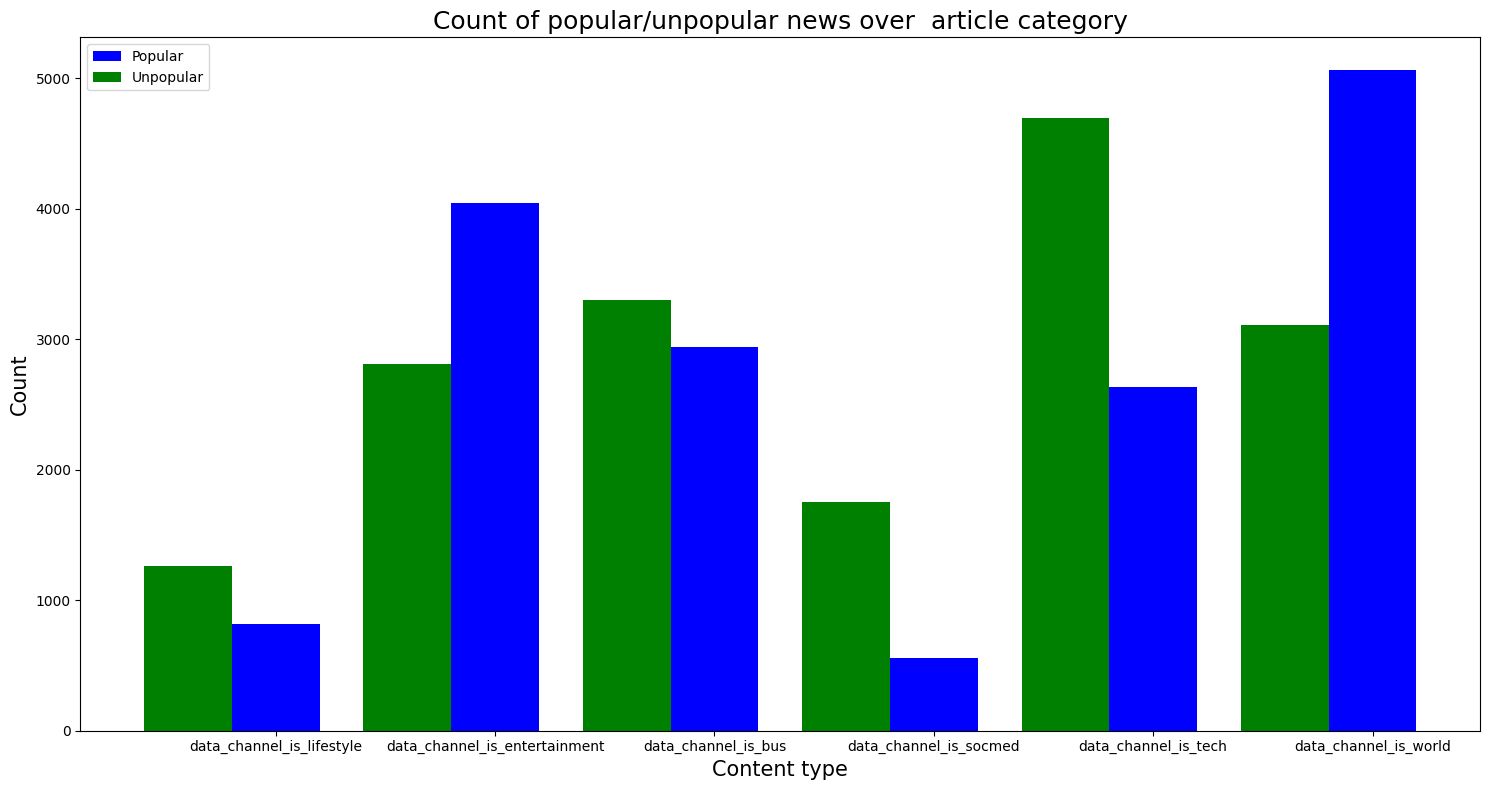

In [20]:
#Catagory vs Popularity 
cont_type= data.columns.values[9:15]
pop_type = art_npop[cont_type].sum().values
npop_type = art_pop[cont_type].sum().values
fig = pl.figure(figsize = (15,8))
pl.title("Count of popular/unpopular news over  article category", fontsize = 18)
pl.bar(np.arange(len(cont_type)), pop_type, width = 0.4, align="center", color = 'b', \
          label = "Popular")
pl.bar(np.arange(len(cont_type)) - 0.4, npop_type, width = 0.4, align = "center", color = 'g', \
          label = "Unpopular")
pl.xticks(np.arange(len(cont_type)), cont_type)

pl.ylabel("Count", fontsize = 15)
pl.xlabel("Content type", fontsize = 15)
    
pl.legend(loc = 'upper left')
pl.tight_layout()
pl.show()

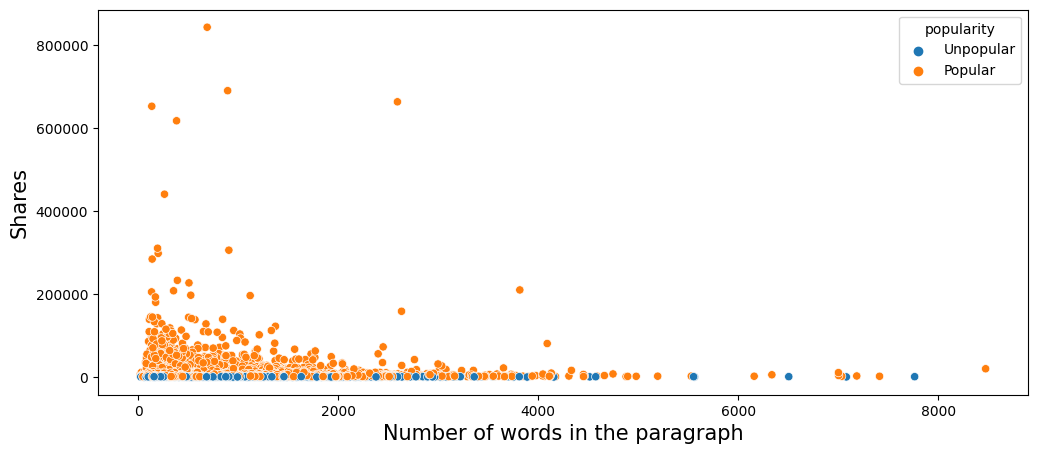

In [21]:

plt.figure(figsize=(12,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', hue='popularity', data=data)
pl.ylabel("Shares", fontsize = 15)
pl.xlabel("Number of words in the paragraph", fontsize = 15)
plt.show()

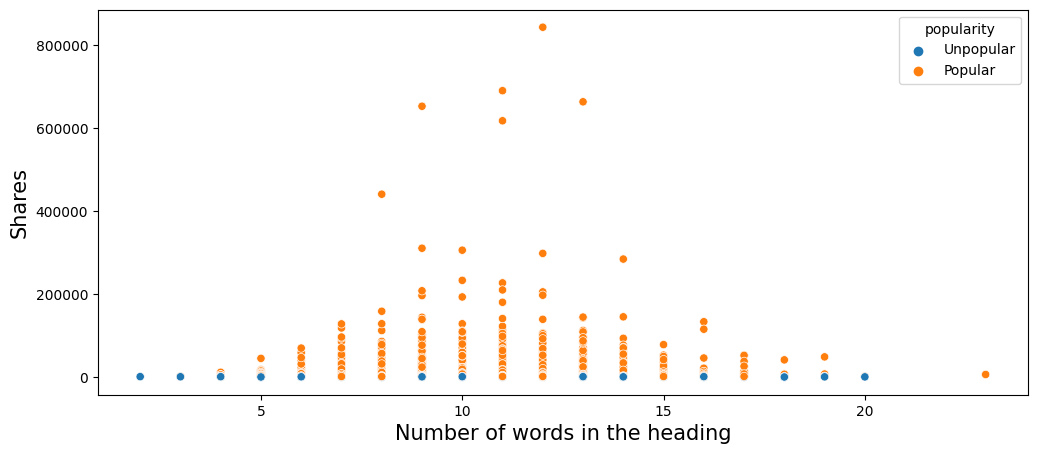

In [22]:
#Number of words in the heading vs Popularity
plt.figure(figsize=(12,5))
ax = sns.scatterplot(y= 'shares', x='n_tokens_title', hue='popularity', data=data);
pl.ylabel("Shares", fontsize = 15)
pl.xlabel("Number of words in the heading", fontsize = 15)
plt.show()

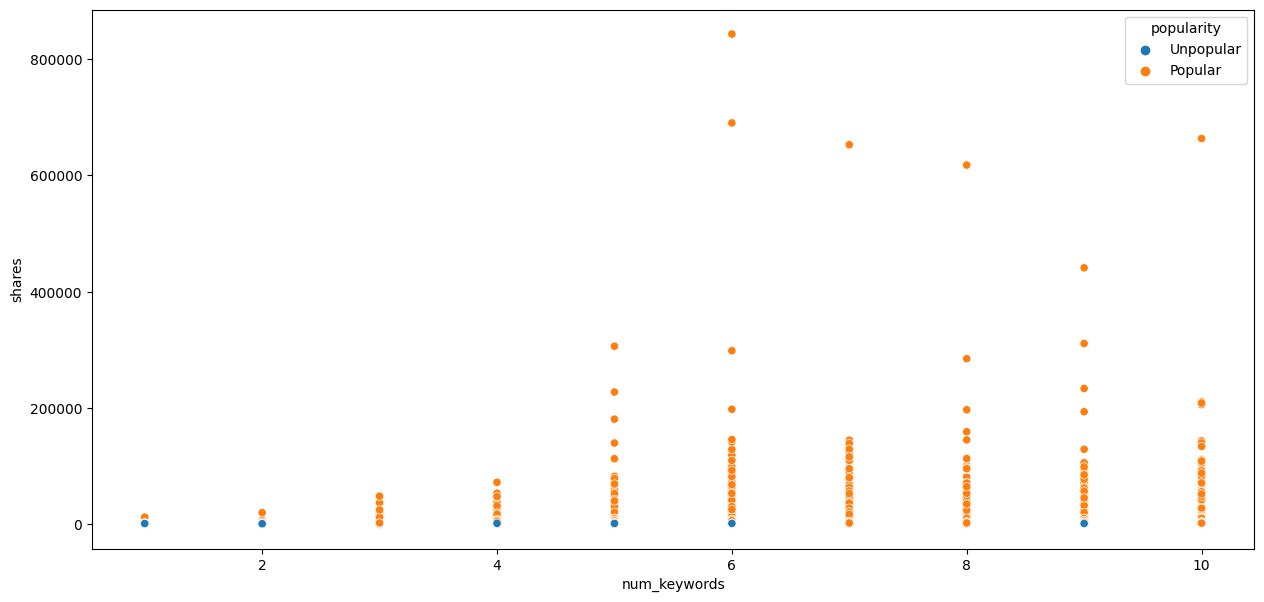

In [23]:
#Number of key words vs Popularity
plt.figure(figsize=(15,7))
sns.scatterplot(x='num_keywords',y='shares', hue='popularity', data=data)
plt.show()

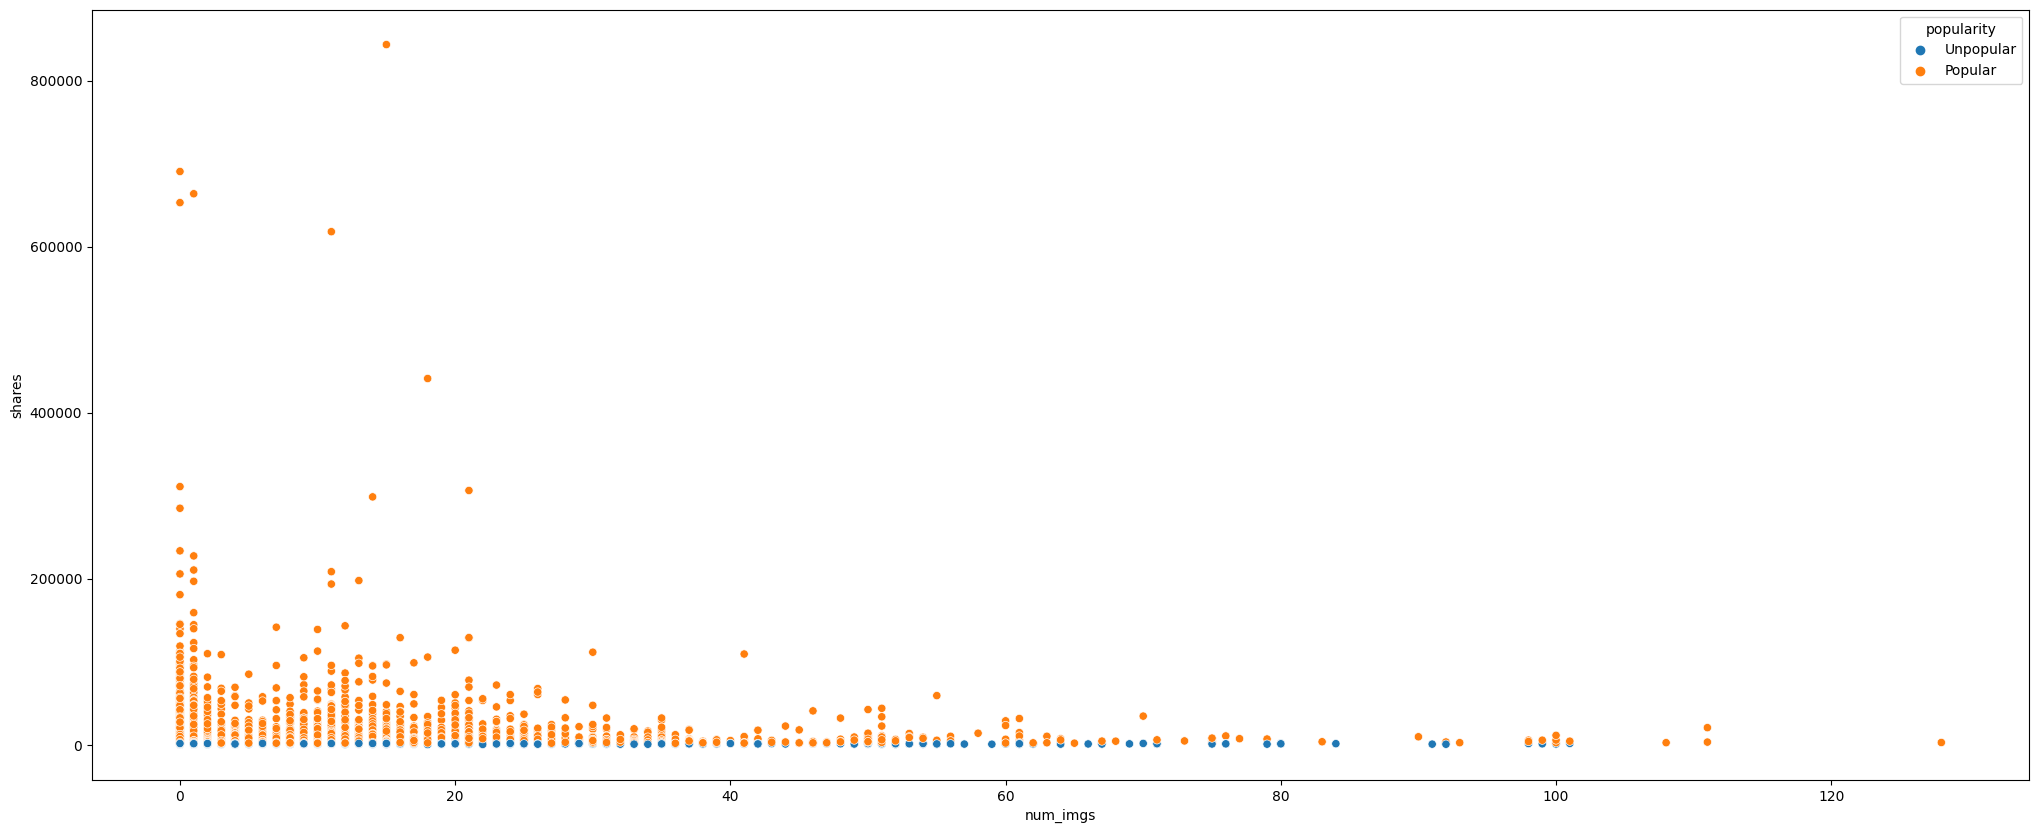

In [24]:
#Number of images vs Popularity 
plt.figure(figsize=(25,10))
sns.scatterplot(x='num_imgs',y='shares', hue='popularity', data=data)
plt.show()

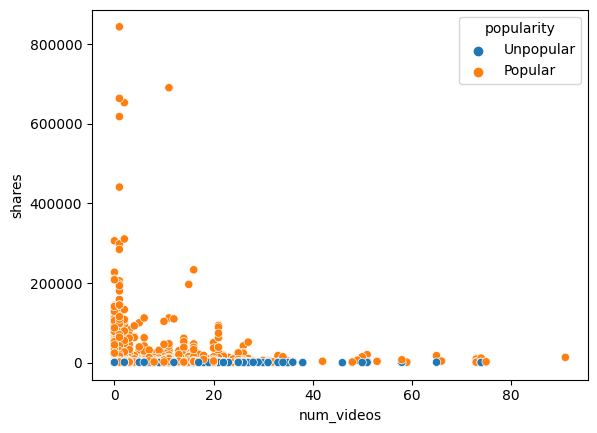

In [25]:
#Number of videos vs Popularity 
sns.scatterplot(x='num_videos', y='shares', hue='popularity', data=data)
plt.show()

Conclusions

n_tokens_content -> At most 1700 words. Amount over 2000 is having way less shares. 

- n_tokens_title -> Between 7-15 words in the heading.

- n_unique_tokens -> Boundaries about 0.4-0.8. This feature describes rate of unique words in the content.

- num_imgs -> In the interval from 0 - 30 at most. This feature stands for number of images in the article.

- num_videos -> Up to 20 videos per article.

- num_keywords -> This feature should be around 6-10. Relates to number of keywords in the metadata.

- num_hrefs -> Should be somewhere from 0 -75. Defines number of links

- average_token_length -> Defines the average length of words in the content. Should be from 4 up to 6 words.

- weekdays -> Tuesdays and Wednesdays are definitely days with the highest number of shares. On the other hand weekends are not worth publishing.

- types -> Most popular categories are world and entertainment.

## Transforming and scaling the data

A normal distribution cannot be found in the provided data.
To change the entire set of data into a distribution that is as close to normal as possible, a log transformation will be used. 

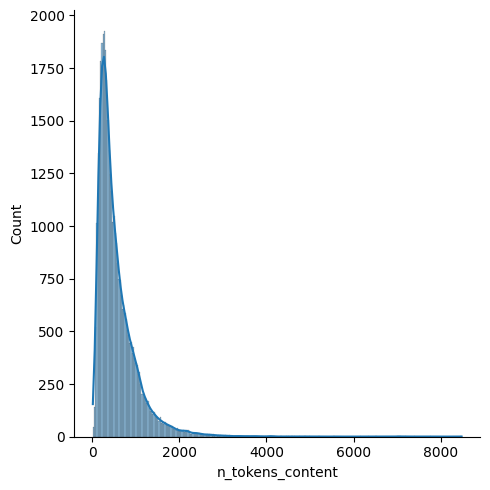

In [26]:
# before log transformation
original_data = copy(data)
sns.displot(original_data['n_tokens_content'], kde=True);

In [27]:
#Transforming features to a normal distribution by applying log transformation.
#Note: It can only be done to non-zero features to avoid dividing by zero.

for col in data.iloc[:,:-1].columns:
    temp = data[data[col] == 0]
    if temp.shape[0] == 0:
        data[col] = np.log(data[col])

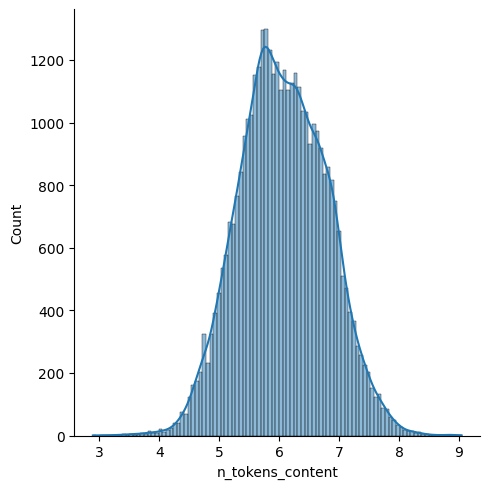

In [28]:
# distribution after log transformation
sns.displot(data['n_tokens_content'], kde=True)

In [29]:
# scale features using statistics that are robust to outliers.
# The RobustScaler is used because it is based on percentiles
#  therefore not influenced by a small number of very large marginal outliers. 
# Note that the outliers themselves are still present in the transformed data.
# source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# feature scaling all data besides the shares and popularity features
scaled_data = scaler.fit_transform(data.iloc[:, :-2])

# update data with the scaled featrues
data.iloc[:, :-2] = scaled_data


In [30]:
# the data after log transformation and robust scaler
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,0.055374,0.019763,-0.044655,0.357541,0.131590,1.187687,1.263786,0.014622,-0.024493,0.054000,...,-0.032476,-0.050093,-0.070626,-0.094503,-0.144014,0.311147,0.520642,-0.472706,0.619718,7.469288
std,0.734370,0.703282,0.802998,1.260064,1.289924,2.765122,4.164896,0.764963,0.730870,0.226021,...,1.407646,0.531272,0.877328,0.696149,1.265583,0.647122,1.938480,0.565818,0.902544,0.925483
min,-5.594502,-3.050697,-6.288267,-0.888889,-1.000000,-0.333333,0.000000,-3.339577,-4.799205,0.000000,...,-2.000000,-2.000000,-5.374142,-1.244444,-12.000000,-0.250000,-7.333333,-1.500000,0.000000,0.000000
25%,-0.366239,-0.474026,-0.521254,-0.333333,-0.666667,0.000000,0.000000,-0.496222,-0.380182,0.000000,...,-1.000000,-0.500000,-0.534287,-0.533333,-0.333333,-0.250000,0.000000,-1.000000,0.000000,6.851185
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.244228
75%,0.633761,0.525974,0.478746,0.666667,0.333333,1.000000,1.000000,0.503778,0.619818,0.000000,...,0.000000,0.500000,0.465713,0.466667,0.666667,0.750000,1.000000,0.000000,1.000000,7.901007
max,2.895242,2.896457,29.014405,32.888889,37.666667,42.333333,91.000000,6.939609,0.879669,1.000000,...,18.000000,0.500000,1.866081,1.244444,1.333333,1.750000,7.333333,0.000000,4.000000,13.645078


## Dimensionality reduction

Dimensionality reduction can also be useful for visualizing the clusters that are found by k-means. K-means is typically used for clustering high-dimensional data, which can be difficult to visualize in its original space. Dimensionality reduction can transform the data into a lower-dimensional space, which makes it easier to visualize and interpret the clusters done later on.

The appropriate method depend on the specific dataset so we try both PCA and t-SNE.

### PCA 

In [31]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.iloc[:,:-2])
data_reduced.shape

(38463, 2)

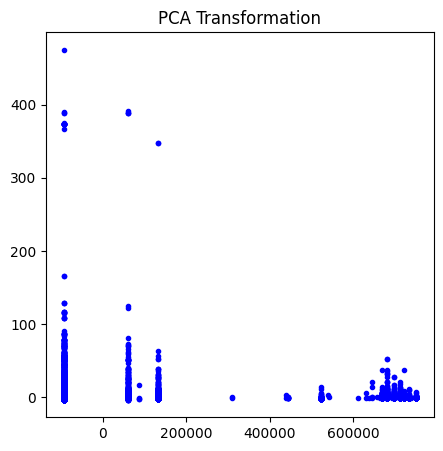

In [32]:
# plotting the clusters PCA
plt.figure(figsize=(5,5))
plt.plot(data_reduced[:,0], data_reduced[:,1], 'b.')
plt.title('PCA Transformation')

plt.show()

### t-SNE

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300, random_state=42)
reduced_tsne = tsne.fit_transform(data.iloc[:,:-2])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


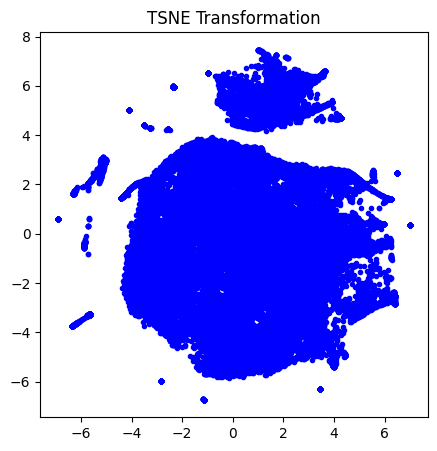

In [34]:
# plotting the clusters TSNE
plt.figure(figsize=(5,5))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'b.')
plt.title('TSNE Transformation')
plt.show()


##Needs better explanation##

## Data Clustering

Grouping Similar Articles together

Using the numerical representation of each article we apply the k-means algorithm to group the articles into clusters. The algorithm will iteratively assign each article to the cluster with the nearest centroid (i.e., the center point of the cluster), and then it will update the centroids to be the average of all the articles assigned to that cluster. This process will continue until the centroids stop changing or a predefined number of iterations is reached.

After the algorithm has finished running, we have a set of clusters, each containing a group of similar articles. The we use these clusters to group similar articles together and build a model for all the articles.

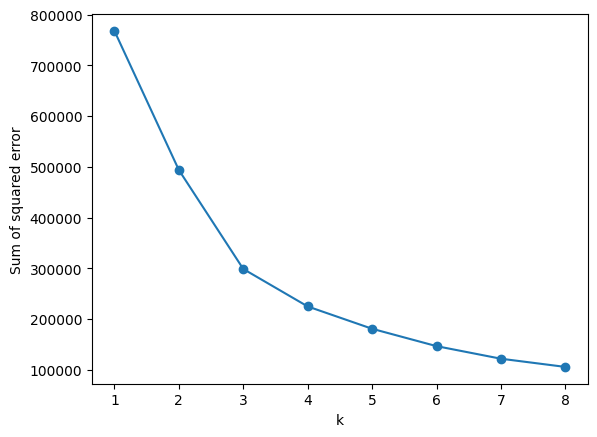

In [35]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(reduced_tsne)
    ssd.append(kmeans.inertia_)

plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()


In [36]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=4)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

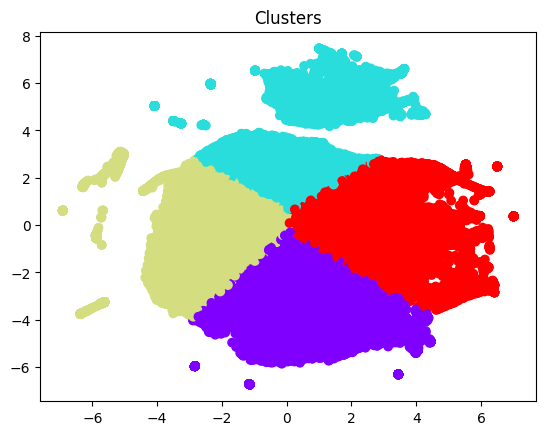

In [37]:
#Visualizing the clusters
plt.scatter(reduced_tsne[:,0],reduced_tsne[:,1],c=kmeans_preds,cmap='rainbow')
plt.title('Clusters')
plt.show()


In [38]:
clust_data=pd.concat([data.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['cluster'])],axis=1)

In [39]:
clust_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,cluster
0,0.633761,-0.636134,0.812476,-0.444444,-0.333333,0.000000,0.0,0.017074,-0.829843,0.0,...,-0.667997,-0.248889,-1.333333,0.750000,-1.375,-1.500000,0.750000,6.385194,Unpopular,2
1,-0.366239,-0.489067,0.436317,-0.555556,-0.666667,0.000000,0.0,0.639390,-1.380182,0.0,...,1.006305,0.933333,0.000000,-0.250000,0.000,0.000000,0.000000,6.566672,Unpopular,2
2,-0.366239,-0.672094,0.232948,-0.555556,-0.666667,0.000000,0.0,-0.792290,-0.380182,0.0,...,-1.512690,-0.746667,-0.444444,-0.250000,0.000,0.000000,0.000000,7.313220,Popular,2
3,-0.366239,0.219733,-0.303499,0.111111,-1.000000,0.000000,0.0,-0.758763,0.000000,0.0,...,-0.810607,-0.248889,-0.888889,-0.250000,0.000,0.000000,0.000000,7.090077,Unpopular,2
4,0.911994,0.898597,-1.082499,1.222222,5.333333,6.333333,0.0,0.023824,0.000000,0.0,...,0.271840,0.000000,0.666667,0.659091,1.000,-1.363636,0.545455,6.224558,Unpopular,2


In [40]:
#creating new datasets from the clusters
clust1_data = clust_data[clust_data['cluster'] == 0]
clust2_data = clust_data[clust_data['cluster'] == 1]
clust3_data = clust_data[clust_data['cluster'] == 2]
clust4_data = clust_data[clust_data['cluster'] == 3]
print ('Cluster1 size: ',clust1_data.shape)
print ('Cluster2 size: ',clust2_data.shape)
print ('Cluster3 size: ',clust3_data.shape)
print ('Cluster4 size: ',clust4_data.shape)

Cluster1 size:  (8808, 58)
Cluster2 size:  (9080, 58)
Cluster3 size:  (11471, 58)
Cluster4 size:  (9104, 58)


In [41]:
from collections import Counter
# the input variable are the numerical features of each article
# the target ooutput variable is the categorical label popularity

#Cluster 1
X1 = clust1_data.iloc[:, :-3]
y1 = clust1_data.iloc[:, -2]
counter = Counter(y1)
print(counter)

#Cluster 2
X2 = clust2_data.iloc[:, :-3]
y2 = clust2_data.iloc[:, -2]
counter = Counter(y2)
print(counter)

#Cluster 3
X3 = clust3_data.iloc[:, :-3]
y3 = clust3_data.iloc[:, -2]
counter = Counter(y3)
print(counter)

#Cluster 4
X4 = clust4_data.iloc[:, :-3]
y4 = clust4_data.iloc[:, -2]
counter = Counter(y1)
print(counter)


Counter({'Unpopular': 4869, 'Popular': 3939})
Counter({'Popular': 4575, 'Unpopular': 4505})
Counter({'Unpopular': 6417, 'Popular': 5054})
Counter({'Unpopular': 4869, 'Popular': 3939})


## Balancing dataset with SMOTE

In [42]:
'''
!pip install imblearn==0.0

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
'''

'\n!pip install imblearn==0.0\n\nfrom imblearn.over_sampling import SMOTE\nfrom matplotlib import pyplot\nfrom numpy import where\n'

In [43]:
'''
#Balancing the data with SMOTE oversampling
oversample = SMOTE()

#Cluster 1 Balanced data 
X1, y1 = oversample.fit_resample(X1, y1)
counter = Counter(y1)
print(counter)

#Cluster 2 Balanced data 
X2, y2 = oversample.fit_resample(X2, y2)
counter = Counter(y2)
print(counter)

#Cluster 3 Balanced data 
X3, y3 = oversample.fit_resample(X3, y3)
counter = Counter(y3)
print(counter)

#Cluster 4 Balanced data 
X4, y4 = oversample.fit_resample(X4, y4)
counter = Counter(y4)
print(counter)
'''

'\n#Balancing the data with SMOTE oversampling\noversample = SMOTE()\n\n#Cluster 1 Balanced data \nX1, y1 = oversample.fit_resample(X1, y1)\ncounter = Counter(y1)\nprint(counter)\n\n#Cluster 2 Balanced data \nX2, y2 = oversample.fit_resample(X2, y2)\ncounter = Counter(y2)\nprint(counter)\n\n#Cluster 3 Balanced data \nX3, y3 = oversample.fit_resample(X3, y3)\ncounter = Counter(y3)\nprint(counter)\n\n#Cluster 4 Balanced data \nX4, y4 = oversample.fit_resample(X4, y4)\ncounter = Counter(y4)\nprint(counter)\n'

## Feature Selection 

Since we have a classification problem with numerical input and categorical output we are going to perform feature selection with the two most popular methods:

- ANOVA F-score 

- Mutual Information 

In [44]:
#Function to extract the best features for each cluster and sort in order of best to worst
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):

    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

### ANOVA F-value

In [45]:
from sklearn.feature_selection import f_classif

In [46]:
#Compute the ANOVA F-values for each cluster 

# F-value for cluster 1
f_data_clust1 = f_classif(X1, y1)

# F-value for cluster 2
f_data_clust2 = f_classif(X2, y2)

# F-value for cluster 3
f_data_clust3 = f_classif(X3, y3)

# F-value for cluster 4
f_data_clust4 = f_classif(X4, y4)

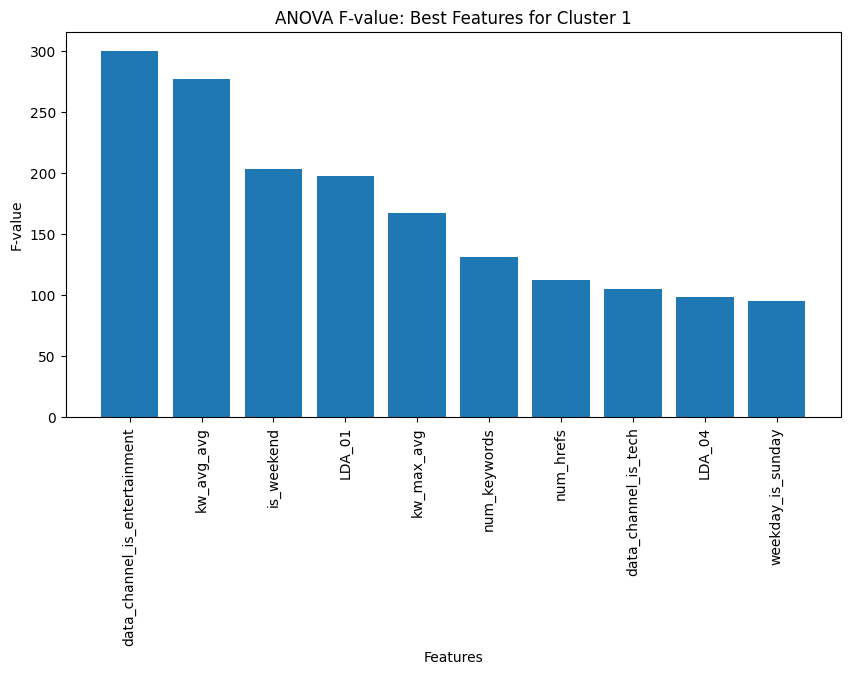

In [47]:
#Extract the 10 best features for cluster 1
fval_best_features1 = extract_best_features(f_data_clust1[0], X1.columns.values, n=10)
fval_best_features1

# plot the best features for cluster 1
plt.figure(figsize=(10,5))
plt.bar(fval_best_features1[:,1], fval_best_features1[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-value')
plt.title('ANOVA F-value: Best Features for Cluster 1')
plt.show()


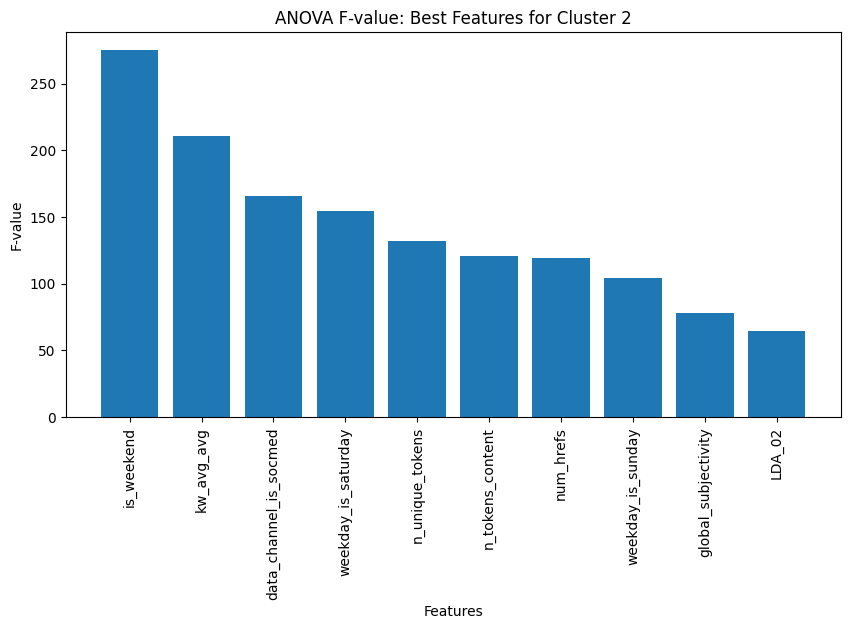

In [48]:
#Extract the 10 best features for cluster 2
fval_best_features2 = extract_best_features(f_data_clust2[0], X2.columns.values, n=10)
fval_best_features2

# plot the best features for cluster 2
plt.figure(figsize=(10,5))
plt.bar(fval_best_features2[:,1], fval_best_features2[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-value')
plt.title('ANOVA F-value: Best Features for Cluster 2')
plt.show()


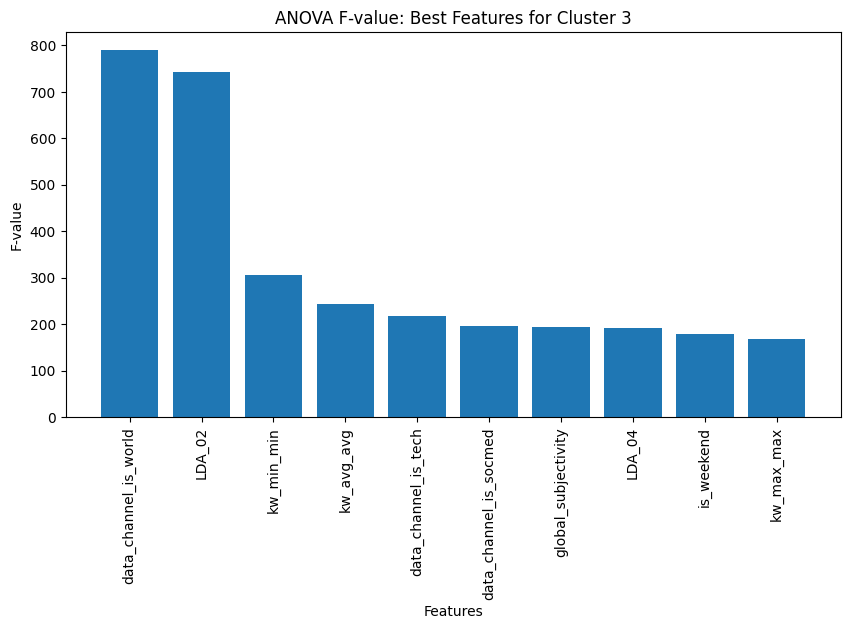

In [49]:
#Extract the 10 best features for cluster 3
fval_best_features3 = extract_best_features(f_data_clust3[0], X3.columns.values, n=10)
fval_best_features3

# plot the best features for cluster 3
plt.figure(figsize=(10,5))
plt.bar(fval_best_features3[:,1], fval_best_features3[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-value')
plt.title('ANOVA F-value: Best Features for Cluster 3')
plt.show()

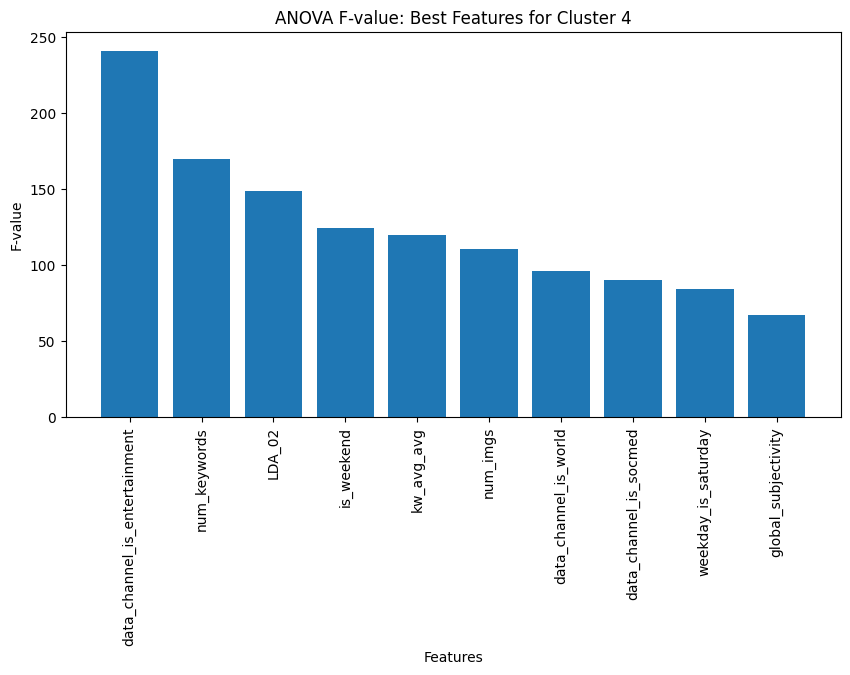

In [50]:
#Extract the 10 best features for cluster 4
fval_best_features4 = extract_best_features(f_data_clust4[0], X4.columns.values, n=10)
fval_best_features4

# plot the best features for cluster 4
plt.figure(figsize=(10,5))
plt.bar(fval_best_features4[:,1], fval_best_features4[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-value')
plt.title('ANOVA F-value: Best Features for Cluster 4')
plt.show()

### Mutual Information 

In [51]:
# Mutual Information future selection
# the input variable are the numerical features of each article
# the target ooutput variable is the categorical label popularity
from sklearn.feature_selection import mutual_info_classif

# Mutual information for cluster 1
mi_data_clust1 = mutual_info_classif(X1, y1)

# Mutual information for cluster 2
mi_data_clust2 = mutual_info_classif(X2, y2)

# Mutual information for cluster 3
mi_data_clust3 = mutual_info_classif(X3, y3)

# Mutual information for cluster 4
mi_data_clust4 = mutual_info_classif(X4, y4)

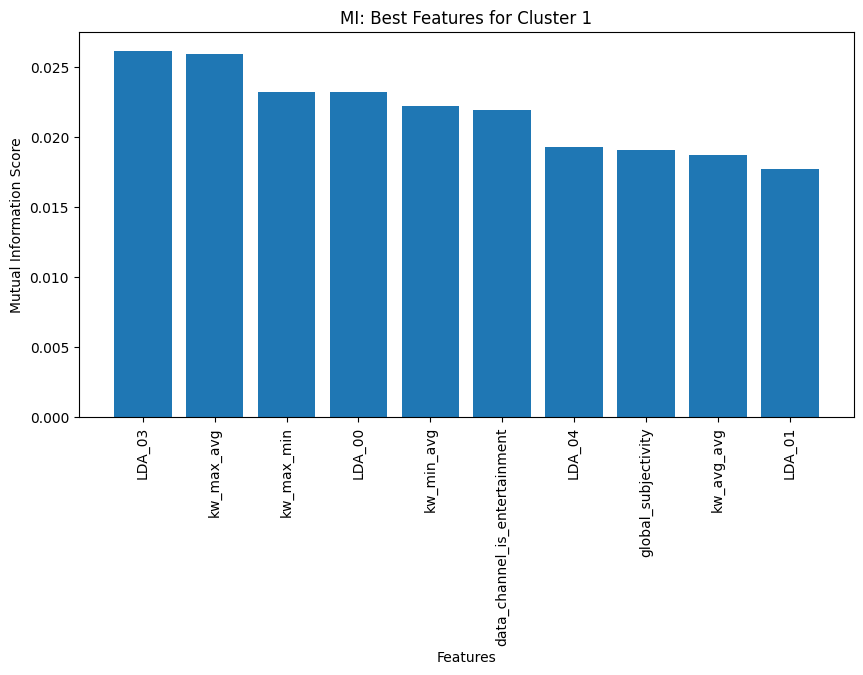

In [52]:
#Extract the 10 best features for cluster 1
mi_best_features1 = extract_best_features(mi_data_clust1, X1.columns.values, n=10)

# plot the best features for cluster 1
plt.figure(figsize=(10,5))
plt.bar(mi_best_features1[:,1], mi_best_features1[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('MI: Best Features for Cluster 1')
plt.show()

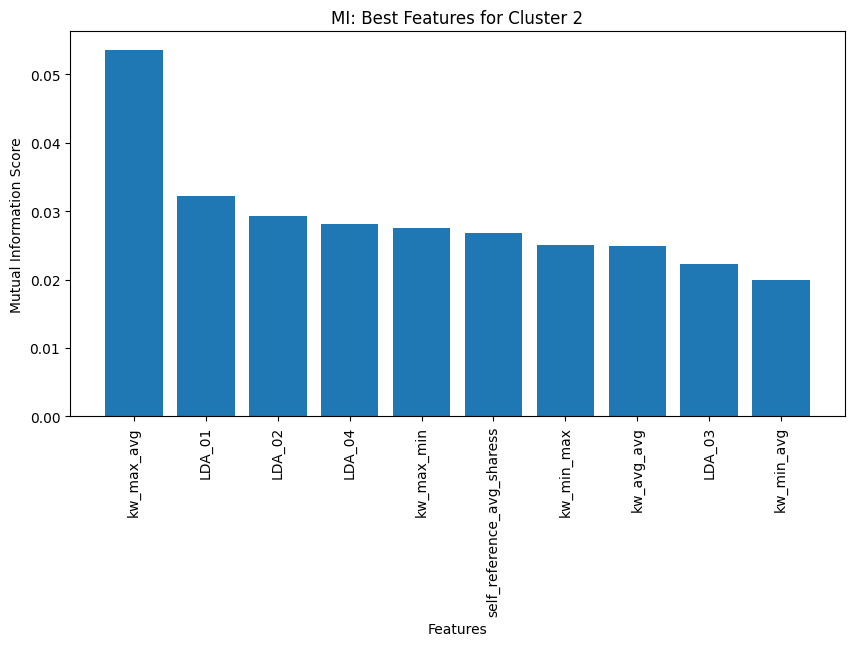

In [53]:
#Extract the 10 best features for cluster 2
mi_best_features2 = extract_best_features(mi_data_clust2, X2.columns.values, n=10)

# plot the best features for cluster 2
plt.figure(figsize=(10,5))
plt.bar(mi_best_features2[:,1], mi_best_features2[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('MI: Best Features for Cluster 2')
plt.show()

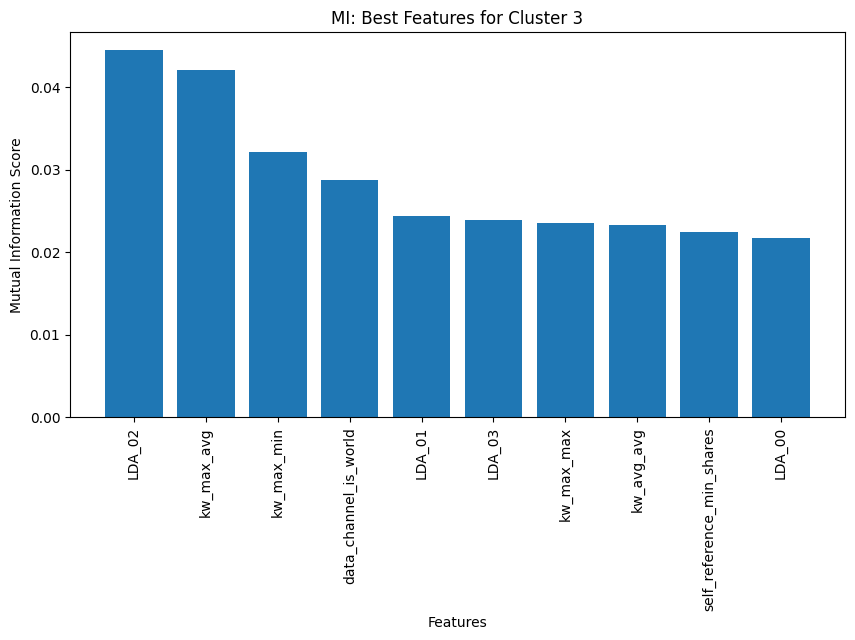

In [54]:
#Extract the 10 best features for cluster 3
mi_best_features3 = extract_best_features(mi_data_clust3, X3.columns.values, n=10)

# plot the best features for cluster 3
plt.figure(figsize=(10,5))
plt.bar(mi_best_features3[:,1], mi_best_features3[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('MI: Best Features for Cluster 3')
plt.show()

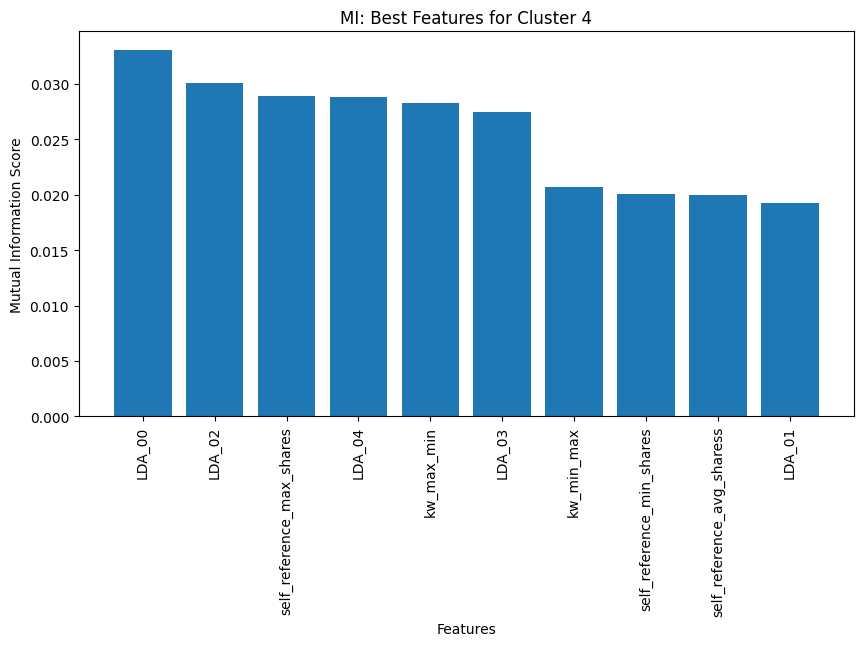

In [55]:
#Extract the 10 best features for cluster 4
mi_best_features4 = extract_best_features(mi_data_clust4, X4.columns.values, n=10)

# plot the best features for cluster 4
plt.figure(figsize=(10,5))
plt.bar(mi_best_features4[:,1], mi_best_features4[:,0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('MI: Best Features for Cluster 4')
plt.show()

## Classification of Online News Popularity

Since the mission of this project is to predict weather an online news article is popular or not, rather than to build a regression model that predicted how many times an article would eventually be shared, the problem is treated as a binary classification of popular and unpopular using the following 5 models: 

- Logistic regression

- KNN

- Decision trees

- Random Forest

- SVMs

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score


### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

ANOVA F-value

In [116]:
def logistic_regression_news_model(name: str, target_labels, X, fval_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fval_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    lr = LogisticRegression().fit(X_train_LR, y_train_LR)
    y_pred_LR = lr.predict(X_test_LR)

    print(f"{name} - Linear regression Results for ANOVA F-value:")
    print(classification_report(y_test_LR, y_pred_LR))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_LR, y_pred_LR))
    print("\n")

    return Counter(y_pred_LR), accuracy_score(y_test_LR,y_pred_LR), precision_score(y_test_LR,y_pred_LR), recall_score(y_test_LR,y_pred_LR), f1_score(y_test_LR,y_pred_LR)



lr1 = logistic_regression_news_model("Cluster 1", y1.values, X1, fval_best_features1)
lr2 = logistic_regression_news_model("Cluster 2", y2.values, X2, fval_best_features2)
lr3 = logistic_regression_news_model("Cluster 3", y3.values, X3, fval_best_features3)
lr4 = logistic_regression_news_model("Cluster 4", y4.values, X4, fval_best_features4)

Cluster 1 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      1110
           1       0.68      0.79      0.73      1533

    accuracy                           0.66      2643
   macro avg       0.65      0.64      0.64      2643
weighted avg       0.66      0.66      0.65      2643

Confusion Matrix:
[[ 535  575]
 [ 318 1215]]


Cluster 2 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1430
           1       0.61      0.76      0.68      1294

    accuracy                           0.66      2724
   macro avg       0.67      0.66      0.66      2724
weighted avg       0.67      0.66      0.66      2724

Confusion Matrix:
[[804 626]
 [305 989]]


Cluster 3 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.57      0

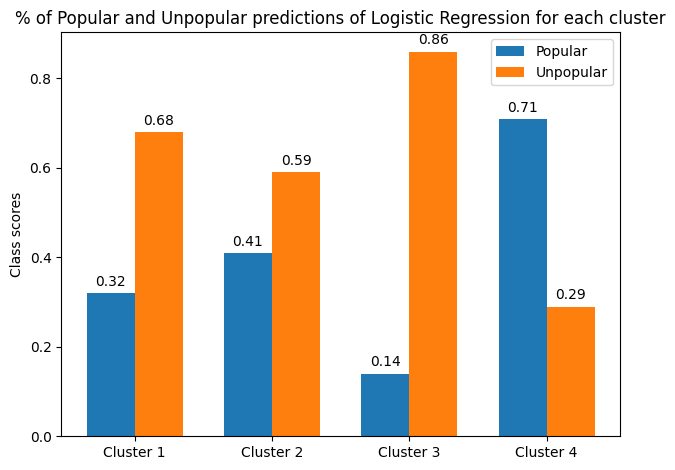

In [60]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

p1 = round(lr1[0][0] / (lr1[0][0] + lr1[0][1]), 2)
p2 = round(lr2[0][0] / (lr2[0][0] + lr2[0][1]), 2)
p3 = round(lr3[0][0] / (lr3[0][0] + lr3[0][1]), 2)
p4 = round(lr4[0][0] / (lr4[0][0] + lr4[0][1]), 2)

men_means = [p1, p2, p3, p4]
women_means = [1-p1, 1-p2, 1-p3, 1-p4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Popular')
rects2 = ax.bar(x + width/2, women_means, width, label='Unpopular')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Class scores')
ax.set_title('% of Popular and Unpopular predictions of Logistic Regression for each cluster')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Mutual Information

In [61]:
def logistic_regression_news_model(name: str, target_labels, X, mi_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    lr = LogisticRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print(f"{name} - Linear regression Results for ANOVA F-value:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    return Counter(y_pred)



lr1 = logistic_regression_news_model("Cluster 1", y1.values, X1, mi_best_features1)
lr2 = logistic_regression_news_model("Cluster 2", y2.values, X2, mi_best_features2)
lr3 = logistic_regression_news_model("Cluster 3", y3.values, X3, mi_best_features3)
lr4 = logistic_regression_news_model("Cluster 4", y4.values, X4, mi_best_features4)



Cluster 1 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1110
           1       0.66      0.78      0.72      1533

    accuracy                           0.64      2643
   macro avg       0.63      0.62      0.62      2643
weighted avg       0.64      0.64      0.63      2643

Confusion Matrix:
[[ 508  602]
 [ 338 1195]]


Cluster 2 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      1430
           1       0.65      0.52      0.58      1294

    accuracy                           0.64      2724
   macro avg       0.64      0.63      0.63      2724
weighted avg       0.64      0.64      0.63      2724

Confusion Matrix:
[[1068  362]
 [ 623  671]]


Cluster 3 - Linear regression Results for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.53   

### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

ANOVA F-value

In [117]:
def knn_news_model(name: str, target_labels, X, fval_best_features):
    #LR for cluster 1
    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fval_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_KN, X_test_KN, y_train_KN, y_test_KN = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    knn = KNeighborsClassifier(n_neighbors=50).fit(X_train_KN, y_train_KN)
    y_pred_KN = knn.predict(X_test_KN)

    print(f"{name} - KNN (k=50) for ANOVA F-value:")
    print(classification_report(y_test_KN, y_pred_KN))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_KN, y_pred_KN))
    print("\n")

    return Counter(y_pred_KN), accuracy_score(y_test_KN,y_pred_KN), precision_score(y_test_KN,y_pred_KN), recall_score(y_test_KN,y_pred_KN), f1_score(y_test_KN,y_pred_KN)

knn1 = knn_news_model("Cluster 1", y1.values, X1, fval_best_features1)
knn2 = knn_news_model("Cluster 2", y2.values, X2, fval_best_features2)
knn3 = knn_news_model("Cluster 3", y3.values, X3, fval_best_features3)
knn4 = knn_news_model("Cluster 3", y4.values, X4, fval_best_features4)
'''
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 2", k, y2.values, X2, fval_best_features2)
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 3", k, y3.values, X3, fval_best_features3)
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 4", k, y4.values, X4, fval_best_features4)
    
'''


Cluster 1 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1110
           1       0.66      0.80      0.72      1533

    accuracy                           0.65      2643
   macro avg       0.64      0.62      0.62      2643
weighted avg       0.64      0.65      0.64      2643

Confusion Matrix:
[[ 488  622]
 [ 309 1224]]


Cluster 2 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1430
           1       0.62      0.67      0.65      1294

    accuracy                           0.65      2724
   macro avg       0.65      0.65      0.65      2724
weighted avg       0.65      0.65      0.65      2724

Confusion Matrix:
[[904 526]
 [423 871]]


Cluster 3 - KNN (k=50) for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      1202
           1       0.

'\nfor k in [5, 10, 15, 20, 30, 40, 50]:\n    knn_news_model("Cluster 2", k, y2.values, X2, fval_best_features2)\nfor k in [5, 10, 15, 20, 30, 40, 50]:\n    knn_news_model("Cluster 3", k, y3.values, X3, fval_best_features3)\nfor k in [5, 10, 15, 20, 30, 40, 50]:\n    knn_news_model("Cluster 4", k, y4.values, X4, fval_best_features4)\n    \n'

Mutual Information

In [64]:
def knn_news_model(name: str, k, target_labels, X, mi_best_features):
    #LR for cluster 1
    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"{name} - KNN (k={k})for ANOVA F-value:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 1", k, y1.values, X1, mi_best_features1)
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 2", k, y2.values, X2, mi_best_features2)
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 3", k, y3.values, X3, mi_best_features3)
for k in [5, 10, 15, 20, 30, 40, 50]:
    knn_news_model("Cluster 4", k, y4.values, X4, mi_best_features4)

Cluster 1 - KNN (k=5)for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48      1110
           1       0.63      0.69      0.66      1533

    accuracy                           0.59      2643
   macro avg       0.57      0.57      0.57      2643
weighted avg       0.58      0.59      0.58      2643

Confusion Matrix:
[[ 496  614]
 [ 471 1062]]


Cluster 1 - KNN (k=10)for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1110
           1       0.64      0.63      0.64      1533

    accuracy                           0.58      2643
   macro avg       0.57      0.57      0.57      2643
weighted avg       0.58      0.58      0.58      2643

Confusion Matrix:
[[567 543]
 [561 972]]


Cluster 1 - KNN (k=15)for ANOVA F-value:
              precision    recall  f1-score   support

           0       0.56      0.43      0.48      1110
           1       0.64  

### Decision Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier

ANOVA F-value

In [115]:
def decision_tree_news_model(name: str, target_labels, X, fval_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fval_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    dt = DecisionTreeClassifier().fit(X_train_DT, y_train_DT)
    y_pred_DT = dt.predict(X_test_DT)

    print(f"{name} - Decision Tree Results for MI:")
    print(classification_report(y_test_DT, y_pred_DT))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_DT, y_pred_DT))
    print("\n")
    return Counter(y_pred_DT), accuracy_score(y_test_DT,y_pred_DT), precision_score(y_test_DT,y_pred_DT), recall_score(y_test_DT,y_pred_DT), f1_score(y_test_DT,y_pred_DT)

dt1 = decision_tree_news_model("Cluster 1", y1.values, X1, fval_best_features1)
dt2 = decision_tree_news_model("Cluster 2", y2.values, X2, fval_best_features2)
dt3 = decision_tree_news_model("Cluster 3", y3.values, X3, fval_best_features3)
dt4 = decision_tree_news_model("Cluster 4", y4.values, X4, fval_best_features4)


Cluster 1 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.48      0.53      0.51      1110
           1       0.63      0.59      0.61      1533

    accuracy                           0.57      2643
   macro avg       0.56      0.56      0.56      2643
weighted avg       0.57      0.57      0.57      2643

Confusion Matrix:
[[587 523]
 [626 907]]


Cluster 2 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1430
           1       0.55      0.57      0.56      1294

    accuracy                           0.58      2724
   macro avg       0.58      0.58      0.58      2724
weighted avg       0.58      0.58      0.58      2724

Confusion Matrix:
[[840 590]
 [559 735]]


Cluster 3 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41      1202
           1       0.68  

Mutual Information

In [67]:
def decision_tree_news_model(name: str, target_labels, X, mi_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    dt = DecisionTreeClassifier().fit(X_train_DT, y_train_DT)
    y_pred_DT = dt.predict(X_test_DT)

    print(f"{name} - Decision Tree Results for MI:")
    print(classification_report(y_test_DT, y_pred_DT))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_DT, y_pred_DT))
    print("\n")

    return Counter(y_pred_DT)


dt1 = decision_tree_news_model("Cluster 1", y1.values, X1, mi_best_features1)
dt2 = decision_tree_news_model("Cluster 2", y2.values, X2, mi_best_features2)
dt3 = decision_tree_news_model("Cluster 3", y3.values, X3, mi_best_features3)
dt4 = decision_tree_news_model("Cluster 4", y4.values, X4, mi_best_features4)


Cluster 1 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47      1110
           1       0.60      0.56      0.58      1533

    accuracy                           0.53      2643
   macro avg       0.53      0.53      0.53      2643
weighted avg       0.54      0.53      0.53      2643

Confusion Matrix:
[[551 559]
 [677 856]]


Cluster 2 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1430
           1       0.55      0.56      0.55      1294

    accuracy                           0.57      2724
   macro avg       0.57      0.57      0.57      2724
weighted avg       0.57      0.57      0.57      2724

Confusion Matrix:
[[831 599]
 [569 725]]


Cluster 3 - Decision Tree Results for MI:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41      1202
           1       0.68  

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

ANOVA f-value

In [95]:
def random_forrest_news_model(name: str, target_labels, X, fval_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fval_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    rf = RandomForestClassifier().fit(X_train_RF, y_train_RF)
    y_pred_RF = rf.predict(X_test_RF)

    print(f"{name} - Random Forrest for ANOVA F-values:")
    print(classification_report(y_test_RF, y_pred_RF))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_RF, y_pred_RF))
    print("\n")

    return Counter(y_pred_RF), accuracy_score(y_test_RF,y_pred_RF), precision_score(y_test_RF,y_pred_RF), recall_score(y_test_RF,y_pred_RF), f1_score(y_test_RF,y_pred_RF)


rf1 = random_forrest_news_model("Cluster 1", y1.values, X1, fval_best_features1)
rf2 = random_forrest_news_model("Cluster 2", y2.values, X2, fval_best_features2)
rf3 = random_forrest_news_model("Cluster 3", y3.values, X3, fval_best_features3)
rf4 = random_forrest_news_model("Cluster 4", y4.values, X4, fval_best_features4)


Cluster 1 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1110
           1       0.68      0.71      0.70      1533

    accuracy                           0.64      2643
   macro avg       0.63      0.63      0.63      2643
weighted avg       0.64      0.64      0.64      2643

Confusion Matrix:
[[ 603  507]
 [ 442 1091]]


Cluster 2 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1430
           1       0.62      0.61      0.61      1294

    accuracy                           0.63      2724
   macro avg       0.63      0.63      0.63      2724
weighted avg       0.63      0.63      0.63      2724

Confusion Matrix:
[[942 488]
 [510 784]]


Cluster 3 - Random Forrest for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.50      0.40      0.45      1202
      

Mutual Information

In [70]:
def random_forrest_news_model(name: str, target_labels, X, mi_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    rf = RandomForestClassifier().fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"{name} - Random Forrest Results for MI:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    print(f1_score(y_test,y_pred))

    return Counter(y_pred)


rf1 = random_forrest_news_model("Cluster 1", y1.values, X1, mi_best_features1)
rf2 = random_forrest_news_model("Cluster 2", y2.values, X2, mi_best_features2)
rf3 = random_forrest_news_model("Cluster 3", y3.values, X3, mi_best_features3)
rf4 = random_forrest_news_model("Cluster 4", y4.values, X4, mi_best_features4)

Cluster 1 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1110
           1       0.66      0.73      0.69      1533

    accuracy                           0.63      2643
   macro avg       0.61      0.61      0.61      2643
weighted avg       0.62      0.63      0.62      2643

Confusion Matrix:
[[ 544  566]
 [ 419 1114]]


0.6934329287270463
Cluster 2 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1430
           1       0.64      0.58      0.61      1294

    accuracy                           0.65      2724
   macro avg       0.65      0.64      0.64      2724
weighted avg       0.65      0.65      0.64      2724

Confusion Matrix:
[[1013  417]
 [ 546  748]]


0.6083773891825945
Cluster 3 - Random Forrest Results for MI:
              precision    recall  f1-score   support

           0       0.50      0

### SVMs

In [71]:
from sklearn.svm import SVC

ANOVA F-value

In [114]:
def svm_news_model(name: str, target_labels, X, fval_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(fval_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    svm = SVC().fit(X_train_SV, y_train_SV)
    y_pred_SV = svm.predict(X_test_SV)

    print(f"{name} - SVM for ANOVA F-values:")
    print(classification_report(y_test_SV, y_pred_SV))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_SV, y_pred_SV))
    print("\n")

    return Counter(y_pred_SV), accuracy_score(y_test_SV,y_pred_SV), precision_score(y_test_SV,y_pred_SV), recall_score(y_test_SV,y_pred_SV), f1_score(y_test_SV,y_pred_SV)
    

svm1 = svm_news_model("Cluster 1", y1.values, X1, fval_best_features1)
svm2 = svm_news_model("Cluster 2", y2.values, X2, fval_best_features2)
svm3 = svm_news_model("Cluster 3", y3.values, X3, fval_best_features3)
svm4 = svm_news_model("Cluster 4", y4.values, X4, fval_best_features4)


Cluster 1 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      1110
           1       0.68      0.78      0.73      1533

    accuracy                           0.66      2643
   macro avg       0.65      0.64      0.64      2643
weighted avg       0.65      0.66      0.65      2643

Confusion Matrix:
[[ 552  558]
 [ 344 1189]]


Cluster 2 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62      1430
           1       0.61      0.78      0.68      1294

    accuracy                           0.65      2724
   macro avg       0.67      0.66      0.65      2724
weighted avg       0.67      0.65      0.65      2724

Confusion Matrix:
[[ 777  653]
 [ 288 1006]]


Cluster 3 - SVM for ANOVA F-values:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1202
           1       0.65      1.00  

Mutual Information

In [73]:
def svm_news_model(name: str, target_labels, X, mi_best_features):

    labelEn = LabelEncoder()
    target_labels = labelEn.fit_transform(target_labels)

    unused_features = list(set(X.columns.values) - set(mi_best_features[:,1]))
    data_cluster_fval = X.drop(unused_features, axis=1, inplace=False)

    X_train, X_test, y_train, y_test = train_test_split(data_cluster_fval, target_labels, test_size=0.3, shuffle=False)

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print(f"{name} - SVM for MI:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    return Counter(y_pred)


svm1 = svm_news_model("Cluster 1", y1.values, X1, mi_best_features1)
svm2 = svm_news_model("Cluster 2", y2.values, X2, mi_best_features2)
svm3 = svm_news_model("Cluster 3", y3.values, X3, mi_best_features3)
svm4 = svm_news_model("Cluster 4", y4.values, X4, mi_best_features4)

Cluster 1 - SVM for MI:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1110
           1       0.66      0.80      0.72      1533

    accuracy                           0.64      2643
   macro avg       0.63      0.61      0.61      2643
weighted avg       0.64      0.64      0.63      2643

Confusion Matrix:
[[ 473  637]
 [ 309 1224]]


Cluster 2 - SVM for MI:
              precision    recall  f1-score   support

           0       0.66      0.59      0.62      1430
           1       0.59      0.66      0.63      1294

    accuracy                           0.63      2724
   macro avg       0.63      0.63      0.63      2724
weighted avg       0.63      0.63      0.63      2724

Confusion Matrix:
[[846 584]
 [437 857]]


Cluster 3 - SVM for MI:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1202
           1       0.65      1.00      0.79      2240

    accuracy        

## Outcomes

We visualized graph which implements the metrics of mentioned classifiers.

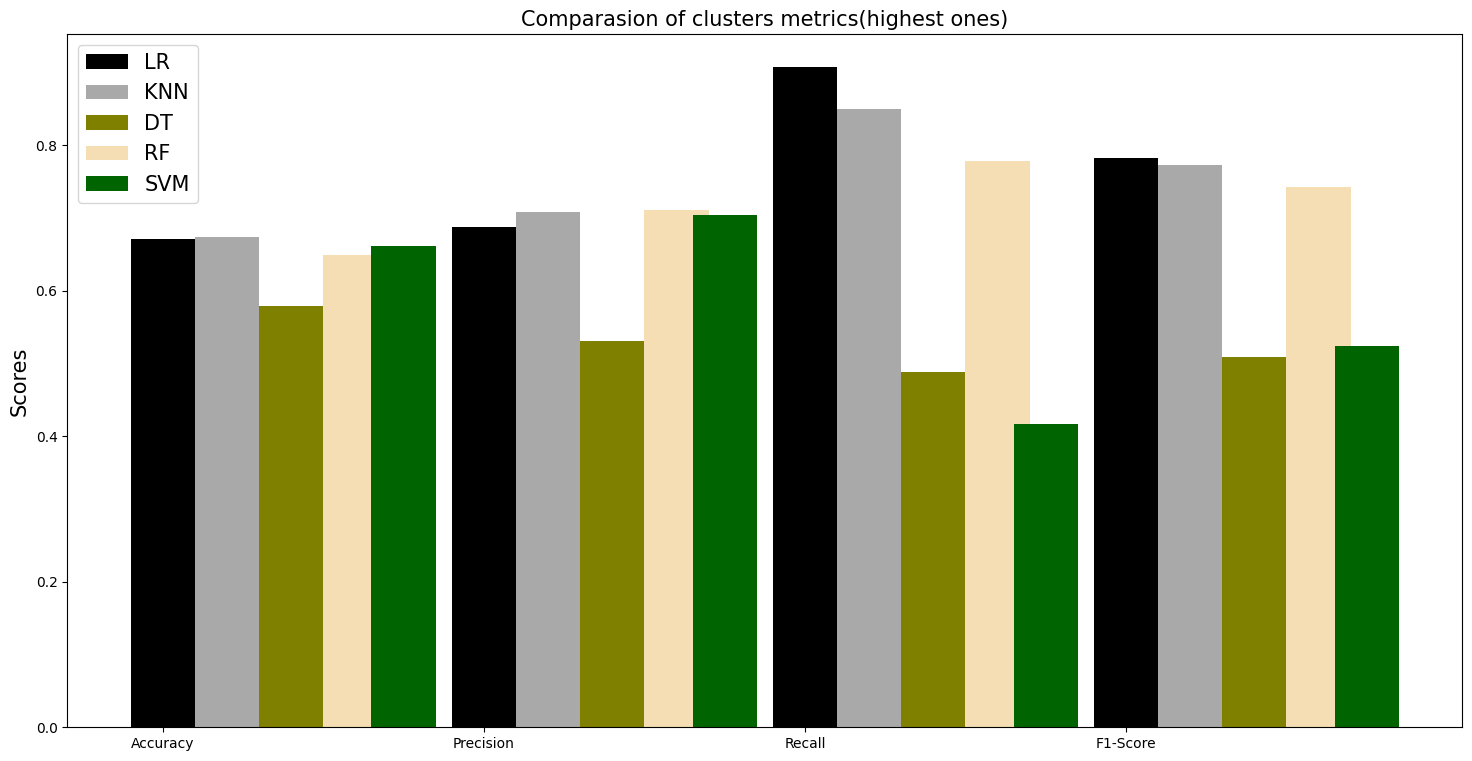

In [113]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_metrics =[0.6705403834979663, 0.6869506423258959, 0.9071428571428571, 0.7818391689111196]
kn_metrics =[0.674026728646136, 0.7078066914498141, 0.85, 0.7724137931034483]
dt_metrics = [0.5790629575402635, 0.53125, 0.48770491803278687, 0.5085470085470086]
rf_metrics = [ 0.6490412550842534, 0.7104404567699837, 0.7776785714285714, 0.742540494458652]
sv_metrics = [0.6614202049780381,0.7040110650069157,0.41721311475409834,0.5239320638188367]
x = np.arange(len(labels))  

fig, ax = plt.subplots(figsize=(18,9))
plt.bar(x, lr_metrics, width=0.2, label='LR',color='black')
plt.bar(x+0.2,kn_metrics,  width=0.2, label='KNN',color='darkgrey')
plt.bar(x+0.4, dt_metrics, width=0.2,label='DT',color='olive')
plt.bar(x+0.6,rf_metrics,width=0.2, label='RF',color="wheat")
plt.bar(x+0.75,sv_metrics, width=0.2, label='SVM',color="darkgreen")

plt.ylabel('Scores',fontsize=15)
plt.title("Comparasion of clusters metrics(highest ones)",fontsize=15)
plt.xticks(x, labels)
plt.legend(fontsize=15)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=103c03bd-1888-4c10-86d1-29ec45228b01' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>